In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from datetime import datetime, timedelta

In [4]:
df = pd.read_csv('airline_passengers.xls')
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [8]:
df = df.set_index('Month')
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0.5, 1.0, 'Number of airline passengers')

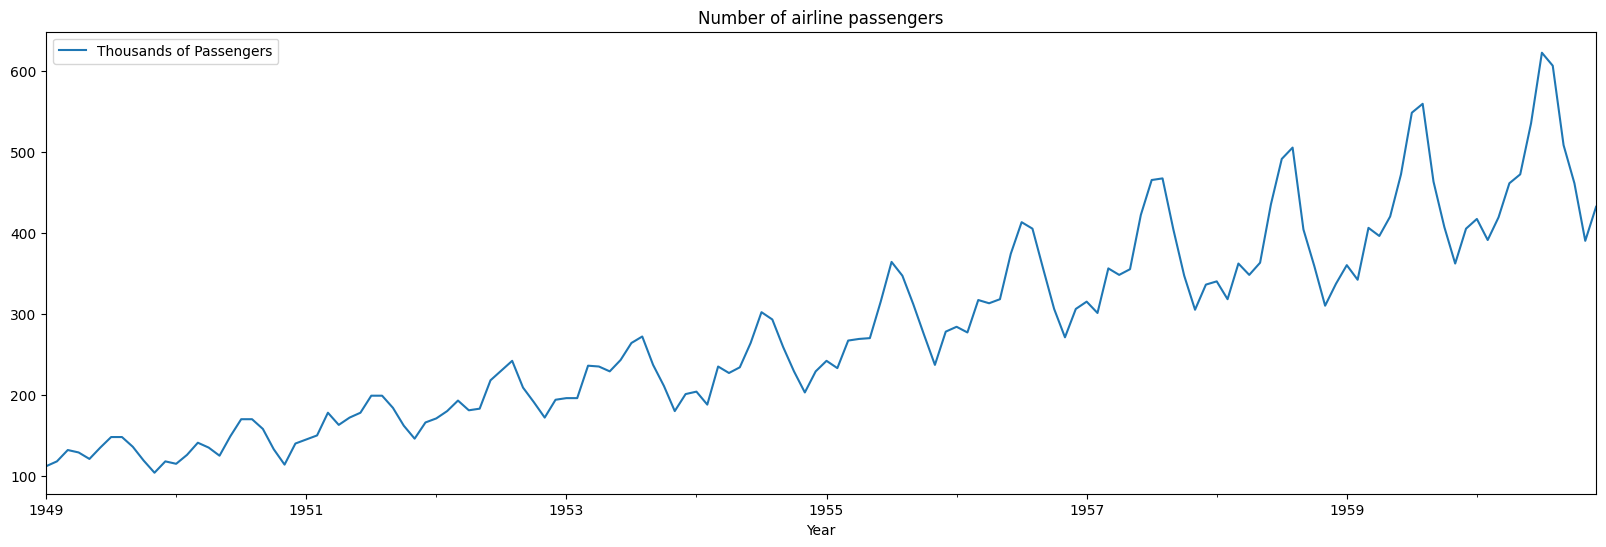

In [9]:
df.plot(figsize=(20, 6))
plt.xlabel('Year')
plt.title('Number of airline passengers')

In [10]:
import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller

In [11]:
def adf_test(series):
  result = adfuller(series)
  print('ADF Statistics: {}'.format(result[0]))
  print('p-value: {}'.format(result[1]))
  if result[1] <= 0.05:
    print('Strong evidence against the null hypothesis, reject the null hypothesis. Data hass no unit root and is stationary.')
  else:
    print('Weak evidence against null hypothesis, time series has a unit root, indicating is not stationary.')


In [12]:
adf_test(df['Thousands of Passengers'])

ADF Statistics: 0.8153688792060498
p-value: 0.991880243437641
Weak evidence against null hypothesis, time series has a unit root, indicating is not stationary.


In [13]:
## Use Technique Differencing
df['Passengers_First_Difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)
df.head()

,Thousands of Passengers,Passengers_First_Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [14]:
adf_test(df['Passengers_First_Difference'].dropna())

ADF Statistics: -2.8292668241700047
p-value: 0.05421329028382478
Weak evidence against null hypothesis, time series has a unit root, indicating is not stationary.


In [15]:
## Use Technique Differencing
df['Passengers_Second_Difference'] = df['Passengers_First_Difference'] - df['Passengers_First_Difference'].shift(1)
df.head()

,Thousands of Passengers,Passengers_First_Difference,Passengers_Second_Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [16]:
adf_test(df['Passengers_Second_Difference'].dropna())

ADF Statistics: -16.384231542468513
p-value: 2.7328918500142026e-29
Strong evidence against the null hypothesis, reject the null hypothesis. Data hass no unit root and is stationary.


In [17]:
## 12 Months
## Use Technique Differencing
df['Passengers_12_Difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)
df.head()

,Thousands of Passengers,Passengers_First_Difference,Passengers_Second_Difference,Passengers_12_Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


In [18]:
adf_test(df['Passengers_12_Difference'].dropna())

ADF Statistics: -3.383020726492481
p-value: 0.011551493085514952
Strong evidence against the null hypothesis, reject the null hypothesis. Data hass no unit root and is stationary.


In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

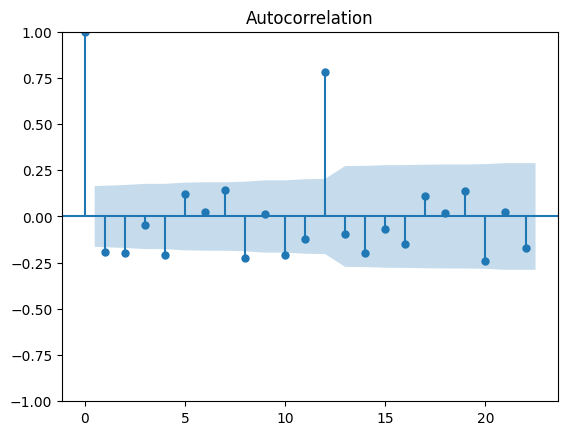

In [20]:
acf = plot_acf(df['Passengers_Second_Difference'].dropna())

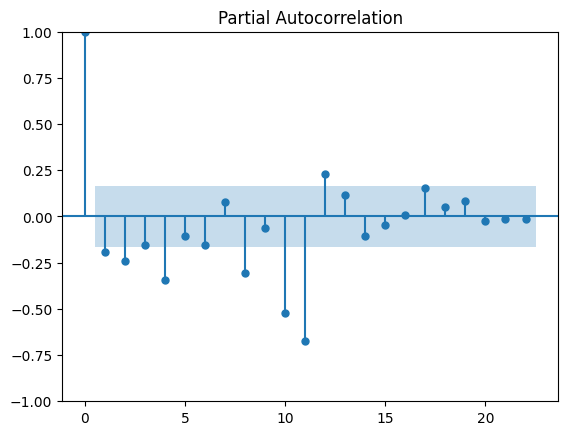

In [21]:
result = plot_pacf(df['Passengers_Second_Difference'].dropna())

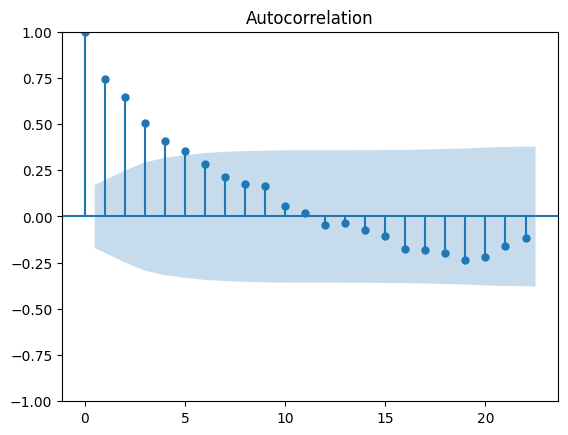

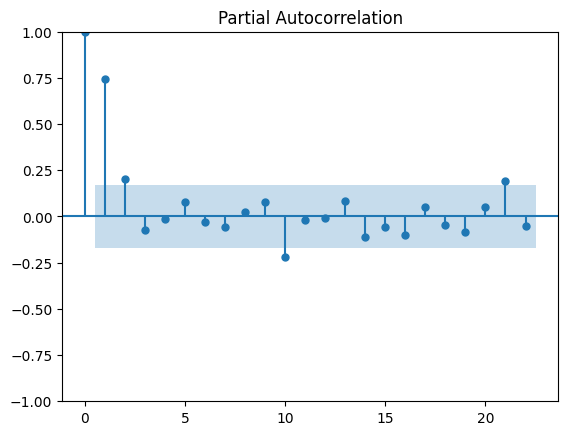

In [22]:
acf12 = plot_acf(df['Passengers_12_Difference'].dropna())
pacf12 = plot_pacf(df['Passengers_12_Difference'].dropna())

In [23]:
## split train and test data
df

,Thousands of Passengers,Passengers_First_Difference,Passengers_Second_Difference,Passengers_12_Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [24]:
train_dataset_end = datetime(1955, 12, 1)
test_dataset_end = datetime(1960, 12, 1)

In [25]:
train_data = df[:train_dataset_end]
test_data = df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [26]:
print(test_data.index[0])
print(test_data.index[-1])

1956-01-01 00:00:00
1960-12-01 00:00:00


In [27]:
## Preddiction
pred_start_date = train_data.index[0]
pred_end_date = train_data.index[-1]

In [28]:
## Creating ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [29]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(14, 2, 12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [30]:
model_ARIMA_fit = model_ARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(14, 2, 12)   Log Likelihood                -306.049
Date:                     Sat, 11 Nov 2023   AIC                            666.097
Time:                             17:56:28   BIC                            731.079
Sample:                         01-01-1949   HQIC                           692.186
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7417      5.587     -0.133      0.894     -11.691      10.208
ar.L2         -0.2026      9.045     -0.022      0.982     -17.931      17.526
ar.L3         -0.2549      9.067     -0.028      0.978     -18.027      17.517
ar.L4         -0.2469      8.979     -0.027      0.978     -17.846      17.353
ar.L5         -0.2915      8.854     -0.033      0.974     -17.644      17.061
ar.L6         -0.1971      8.962     -0.022      0.982     -17.762      17.368
ar.L7         -0.2634      8.549     -0.031      0.975     -17.019      16.492
ar.L8         -0.3339      8.555     -0.039      0.969     -17.102      16.434
ar.L9         -0.2617      8.977     -0.029      0.977     -17.856      17.333
ar.L10        -0.2968      8.941     -0.033      0.974     -17.821      17.228
ar.L11        -0.1215      9.079     -0.013      0.989     -17.915      17.672
ar.L12         0.5781      8.265      0.070      0.944     -15.620      16.776
ar.L13         0.5039      3.777      0.133      0.894      -6.898       7.906
ar.L14        -0.0673      0.489     -0.138      0.890      -1.025       0.891
ma.L1         -0.4302      5.616     -0.077      0.939     -11.437      10.576
ma.L2         -0.5972      2.736     -0.218      0.827      -5.960       4.766
ma.L3         -0.0807      1.330     -0.061      0.952      -2.688       2.526
ma.L4          0.1334      1.993      0.067      0.947      -3.773       4.040
ma.L5          0.2006      1.061      0.189      0.850      -1.879       2.280
ma.L6         -0.2718      0.559     -0.486      0.627      -1.367       0.823
ma.L7          0.2250      1.146      0.196      0.844      -2.020       2.470
ma.L8         -0.2830      0.539     -0.525      0.600      -1.340       0.774
ma.L9          0.2499      1.408      0.177      0.859      -2.511       3.011
ma.L10        -0.1053      0.709     -0.149      0.882      -1.495       1.285
ma.L11        -0.3111      0.748     -0.416      0.678      -1.778       1.156
ma.L12         0.2992      1.865      0.160      0.873      -3.356       3.955
sigma2        73.4694     28.069      2.617      0.009      18.456     128.483
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 3.46
Prob(Q):                              0.80   Prob(JB):                         0.18
Heteroskedasticity (H):               2.14   Skew:                             0.50
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
## Preddiction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [33]:
pred = model_ARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals = test_data['Thousands of Passengers'] - pred

In [34]:
pred

1956-01-01    283.902768
1956-02-01    280.435625
1956-03-01    291.167138
1956-04-01    303.331438
1956-05-01    301.678044
1956-06-01    344.714061
1956-07-01    394.056117
1956-08-01    369.478586
1956-09-01    343.816834
1956-10-01    304.882345
1956-11-01    272.432365
1956-12-01    303.271472
1957-01-01    318.155111
1957-02-01    305.091418
1957-03-01    317.782343
1957-04-01    326.542372
1957-05-01    332.013737
1957-06-01    376.188128
1957-07-01    419.294748
1957-08-01    398.048836
1957-09-01    369.278135
1957-10-01    335.480982
1957-11-01    306.900070
1957-12-01    332.378556
1958-01-01    348.731545
1958-02-01    333.491531
1958-03-01    341.922809
1958-04-01    352.891690
1958-05-01    361.376668
1958-06-01    407.445325
1958-07-01    445.153565
1958-08-01    425.835025
1958-09-01    395.711384
1958-10-01    365.885682
1958-11-01    340.988307
1958-12-01    362.555557
1959-01-01    378.220268
1959-02-01    362.084084
1959-03-01    366.494157
1959-04-01    379.385536


In [35]:
residuals

Month
1956-01-01      0.097232
1956-02-01     -3.435625
1956-03-01     25.832862
1956-04-01      9.668562
1956-05-01     16.321956
1956-06-01     29.285939
1956-07-01     18.943883
1956-08-01     35.521414
1956-09-01     11.183166
1956-10-01      1.117655
1956-11-01     -1.432365
1956-12-01      2.728528
1957-01-01     -3.155111
1957-02-01     -4.091418
1957-03-01     38.217657
1957-04-01     21.457628
1957-05-01     22.986263
1957-06-01     45.811872
1957-07-01     45.705252
1957-08-01     68.951164
1957-09-01     34.721865
1957-10-01     11.519018
1957-11-01     -1.900070
1957-12-01      3.621444
1958-01-01     -8.731545
1958-02-01    -15.491531
1958-03-01     20.077191
1958-04-01     -4.891690
1958-05-01      1.623332
1958-06-01     27.554675
1958-07-01     45.846435
1958-08-01     79.164975
1958-09-01      8.288616
1958-10-01     -6.885682
1958-11-01    -30.988307
1958-12-01    -25.555557
1959-01-01    -18.220268
1959-02-01    -20.084084
1959-03-01     39.505843
1959-04-01     16.6

<Axes: ylabel='Density'>

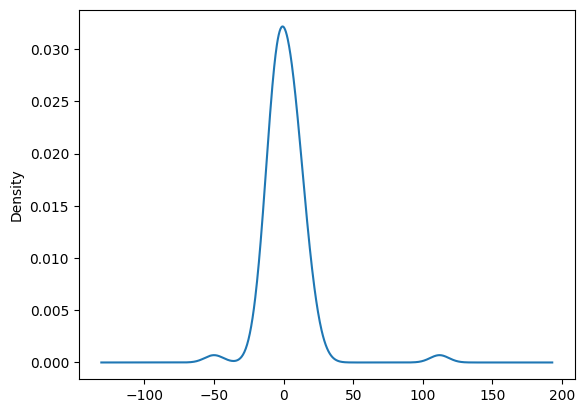

In [36]:
model_ARIMA_fit.resid.plot(kind='kde')

In [37]:
test_data['Predicted_ARIMA'] = pred

<ipython-input-37-90918ede9522>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = pred


<Axes: xlabel='Month'>

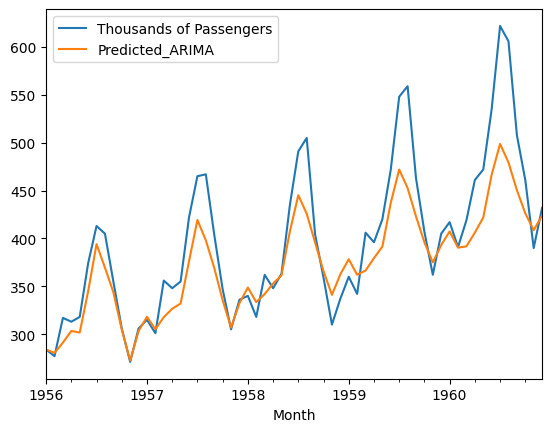

In [38]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA']].plot()

In [39]:
## Creating a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [40]:
model_SARIMA = SARIMAX(train_data['Thousands of Passengers'],order=(3, 0, 5),seasonal_order=(1, 0,1, 12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
model_SARIMA_fit = model_SARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(1, 0, [1], 12)   Log Likelihood                -319.706
Date:                              Sat, 11 Nov 2023   AIC                            661.412
Time:                                      17:56:33   BIC                            688.151
Sample:                                  01-01-1949   HQIC                           672.161
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0290      0.246      0.118      0.906      -0.454       0.512
ar.L2          0.0915      0.283      0.323      0.747      -0.463       0.646
ar.L3          0.8596      0.277      3.107      0.002       0.317       1.402
ma.L1          0.8173      0.272      3.004      0.003       0.284       1.351
ma.L2          0.7466      0.322      2.320      0.020       0.116       1.377
ma.L3         -0.3881      0.198     -1.956      0.050      -0.777       0.001
ma.L4         -0.3282      0.189     -1.734      0.083      -0.699       0.043
ma.L5         -0.3271      0.137     -2.380      0.017      -0.597      -0.058
ar.S.L12       0.9426      0.062     15.246      0.000       0.821       1.064
ma.S.L12      -0.2776      0.188     -1.474      0.140      -0.647       0.091
sigma2        84.3143     17.410      4.843      0.000      50.192     118.437
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.05
Prob(Q):                              0.81   Prob(JB):                         0.13
Heteroskedasticity (H):               2.99   Skew:                             0.53
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
## Prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [44]:
pred_SARIMA = model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals = test_data['Thousands of Passengers'] - pred_SARIMA

<Axes: xlabel='Month'>

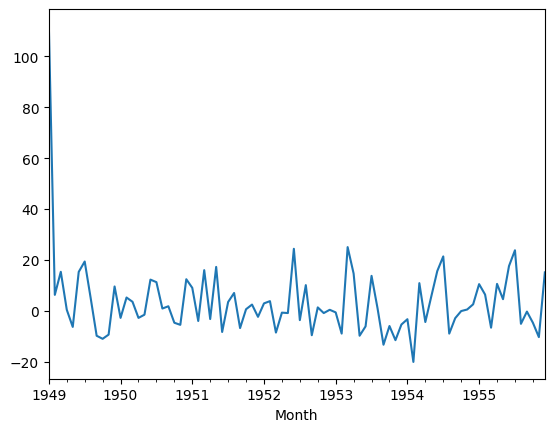

In [45]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

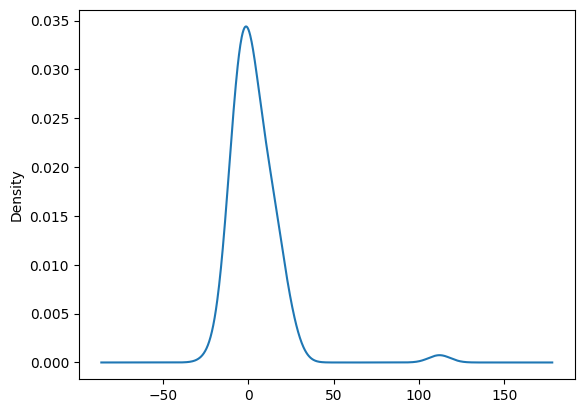

In [46]:
model_SARIMA_fit.resid.plot(kind='kde')

In [47]:
test_data['Predicted_SARIMA'] = pred_SARIMA

<ipython-input-47-cb2d3216000c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA'] = pred_SARIMA


<Axes: xlabel='Month'>

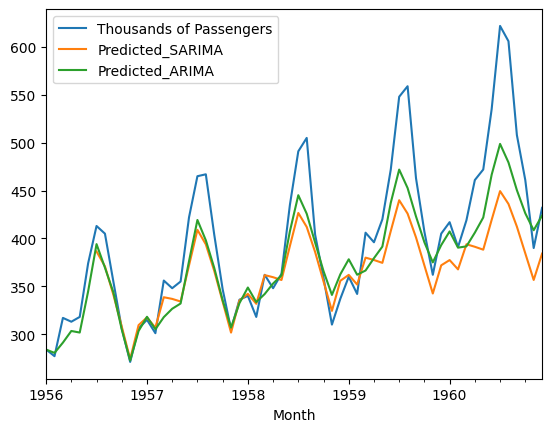

In [48]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()